## Challenge 4: Binary Detection 

In this problem, you are given data which contains realisations of a 2D random variable `Y`. These realisations are obtained from one of two different Gaussian distributions.
Several samples have been determined to belong to Distribution 0 or Distribution 1, and they have been labeled accordingly.
With the the help of this labeled data, we wish to label the unlabelled data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The first step is to import data from the given file.
We import it as three parts: training data for Distribution 0, training data for Distribution 1 and the unlabeled test data.

In [2]:
df = pd.read_csv("4challenge.csv")
df0 = df.loc[df['label'] == 0.0]
df1 = df.loc[df['label'] == 1.0]
dftest = df.loc[~((df['label'] == 0.0) | (df['label'] == 1.0))]

One can use the data in their original Pandas DataFrame format, or one can transform these objects into Numpy-arrays.

In [3]:
TrainingData0 = df0.values
TrainingData1 = df1.values
TestData = dftest.values

It may be helpful to visualize the data.

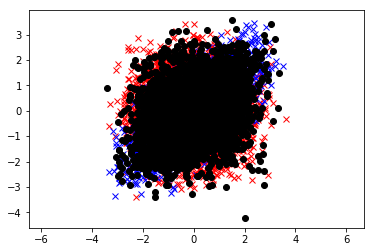

In [4]:
plt.plot(TrainingData0[:,0], TrainingData0[:,1], 'x', color='r')
plt.plot(TrainingData1[:,0], TrainingData1[:,1], 'x', color='b')
plt.plot(TestData[:,0], TestData[:,1], 'o', color='k')
plt.axis('equal')
plt.show()

Define a function to return the mean and covariance of the given data.
Then, define a function that can detect wether a given data point belongs to Distribution 0 or Distribution 1.
This latter function should take a data point, the mean and covariance of Distribution 0, the mean and covariance of Distribution 1, and a threshold as input and returns the label.

We detect the distribution by first calculating the likelihoods of the data point belonging to each distributions.
That is, assuming that the data point belongs to Distribution `i` , what is the probability of its occurence?
We calculate this using the PDF of a multivariate normal distribution with the mean and covariance of the corresponding distributions.
Finally, we take the ratio of these likelihoods and, depending whether the ratio is greater or less than our threshold, we select one distribution as our guess.

In [5]:
def  estimate(X):  #X is trainng data 
    #Note Training Data has a Column named Label which should not be considered for Mean and Covariance Calculations
    Mean = np.mean(X)#Edit
    Covar = np.cov(X)#Edit
    return Mean, Covar

In [17]:
from scipy.stats import multivariate_normal as mvnorm
def detect(X,M0,V0,M1,V1,threshold):
    L0 = mvnorm.pdf(M0)#EDIT
    L1 = mvnorm.pdf(M1)#EDIT
    ratio = L0/L1
    if ratio < threshold:  #EDIT
        d = L0 #EDIT
    else:
        d = L1 #EDIT
    return d


Now use these above functions and create a new dataframe with appropriate labels for the data points.

In [18]:
M0,V0 = estimate(TrainingData0)#EDIT
M1,V1 = estimate(TrainingData1)#EDIT
threshold = 1
if TestData.size != 0:
    decision = np.zeros((int(TestData.shape[0]),1))
    for X in TestData: #Note Test Data has a Column named Label which should not be considered for detection 
        detect(X,M0,V0,M1,V1,threshold)#EDIT 
       
    TestData1 = np.hstack((TestData[:,0:2],decision))
    dftest2 = pd.DataFrame(TestData1,columns=['Y0', 'Y1','label'])
    

After creating an algorithm and generating labels, one should update the original CSV file (in your own directory).

In [19]:
Df = pd.concat([df0, df1, dftest2], join='outer', ignore_index=True)
Df.to_csv("4challenge.csv")

You can then visualise the test data set. (Optional : You can also try to vary the threshold and see how the detection changes)